<a href="https://www.kaggle.com/code/venkateshblks/usa-house-price-prediction?scriptVersionId=191792582" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/usa-house-prices/USA Housing Dataset.csv


In [2]:

from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


## Description of each feature:

**Date:** The date when the property was sold. This feature helps in understanding
the temporal trends in property prices.

**Price:**The sale price of the property in USD. This is the target variable we aim
to predict.

**Bedrooms:**The number of bedrooms in the property. Generally, properties with
more bedrooms tend to have higher prices.

**Bathrooms:** The number of bathrooms in the property. Similar to bedrooms,
more bathrooms can increase a property’s value.

**Sqft Living:** The size of the living area in square feet. Larger living areas are
typically associated with higher property values.

**Sqft Lot:**The size of the lot in square feet. Larger lots may increase a property’s
desirability and value.

**Floors:** The number of floors in the property. Properties with multiple floors may
offer more living space and appeal.

**Waterfront:** A binary indicator (1 if the property has a waterfront view, 0 other-
wise). Properties with waterfront views are often valued higher.

**View:** An index from 0 to 4 indicating the quality of the property’s view. Better
views are likely to enhance a property’s value.

**Condition:** An index from 1 to 5 rating the condition of the property. Properties
in better condition are typically worth more.

**Sqft Above:** The square footage of the property above the basement. This can
help isolate the value contribution of above-ground space.

**Sqft Basement:** The square footage of the basement. Basements may add value
depending on their usability.

**Yr Built:** The year the property was built. Older properties may have historical
value, while newer ones may offer modern amenities.

**Yr Renovated:** The year the property was last renovated. Recent renovations can
increase a property’s appeal and value.

**Street:** The street address of the property. This feature can be used to analyze
location-specific price trends.

**City:** The city where the property is located. Different cities have distinct market
dynamics.

**Statezip:** The state and zip code of the property. This feature provides regional
context for the property.
Country: The country where the property is located. While this dataset focuses
on properties in Australia, this feature is included for completeness.

In [3]:
df=pd.read_csv('/kaggle/input/usa-house-prices/USA Housing Dataset.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

In [5]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [6]:
df.city.unique()

array(['Seattle', 'Carnation', 'Issaquah', 'Maple Valley', 'Kent',
       'Redmond', 'Clyde Hill', 'Shoreline', 'Mercer Island', 'Auburn',
       'Bellevue', 'Duvall', 'Renton', 'Sammamish', 'Woodinville',
       'Kirkland', 'Burien', 'Federal Way', 'Normandy Park', 'Vashon',
       'Kenmore', 'Yarrow Point', 'SeaTac', 'Newcastle', 'Covington',
       'Lake Forest Park', 'Snoqualmie', 'Des Moines', 'Fall City',
       'Ravensdale', 'Tukwila', 'North Bend', 'Medina', 'Bothell',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Black Diamond',
       'Beaux Arts Village', 'Algona', 'Preston', 'Milton', 'Skykomish'],
      dtype=object)

In [7]:
df.statezip.unique()

array(['WA 98103', 'WA 98014', 'WA 98029', 'WA 98117', 'WA 98146',
       'WA 98038', 'WA 98031', 'WA 98136', 'WA 98122', 'WA 98053',
       'WA 98105', 'WA 98004', 'WA 98112', 'WA 98155', 'WA 98126',
       'WA 98040', 'WA 98092', 'WA 98005', 'WA 98019', 'WA 98118',
       'WA 98006', 'WA 98178', 'WA 98106', 'WA 98116', 'WA 98058',
       'WA 98074', 'WA 98077', 'WA 98033', 'WA 98115', 'WA 98052',
       'WA 98168', 'WA 98107', 'WA 98042', 'WA 98027', 'WA 98125',
       'WA 98072', 'WA 98166', 'WA 98003', 'WA 98109', 'WA 98177',
       'WA 98034', 'WA 98070', 'WA 98199', 'WA 98028', 'WA 98023',
       'WA 98133', 'WA 98056', 'WA 98030', 'WA 98008', 'WA 98108',
       'WA 98102', 'WA 98001', 'WA 98075', 'WA 98188', 'WA 98007',
       'WA 98065', 'WA 98059', 'WA 98198', 'WA 98002', 'WA 98144',
       'WA 98024', 'WA 98051', 'WA 98055', 'WA 98045', 'WA 98039',
       'WA 98119', 'WA 98032', 'WA 98011', 'WA 98022', 'WA 98148',
       'WA 98068', 'WA 98047', 'WA 98057', 'WA 98010', 'WA 980

In [8]:
df.country.unique()

array(['USA'], dtype=object)

In [9]:
df.street.nunique()

4079

In [10]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [11]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.140000e+03,4140.000000,4140.000000,4140.000000,4.140000e+03,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,5.530629e+05,3.400483,2.163043,2143.638889,1.469764e+04,1.514130,0.007488,0.246618,3.452415,1831.351449,312.287440,1970.814010,808.368357
std,5.836865e+05,0.903939,0.784733,957.481621,3.587684e+04,0.534941,0.086219,0.790619,0.678533,861.382947,464.349222,29.807941,979.380535
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.200000e+05,3.000000,1.750000,1470.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.600000e+05,3.000000,2.250000,1980.000000,7.676000e+03,1.500000,0.000000,0.000000,3.000000,1600.000000,0.000000,1976.000000,0.000000
75%,6.591250e+05,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,2310.000000,602.500000,1997.000000,1999.000000
max,2.659000e+07,8.000000,6.750000,10040.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,8020.000000,4820.000000,2014.000000,2014.000000


In [12]:
df.shape

(4140, 18)

In [13]:
def remove_outliers_zscore(df, threshold=3):
    df1 = df.copy()
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        z_scores = np.abs(stats.zscore(df1[col]))
        df1 = df1[z_scores < threshold]
    return df1

df1 = remove_outliers_zscore(df)
df1.shape


(3742, 18)

## Data Visualization

<Axes: xlabel='sqft_living', ylabel='price'>

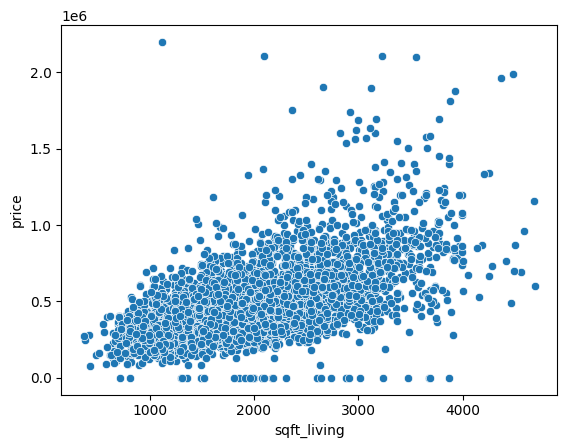

In [14]:
sns.scatterplot(x='sqft_living', y='price', data=df1)

<Axes: xlabel='price', ylabel='Count'>

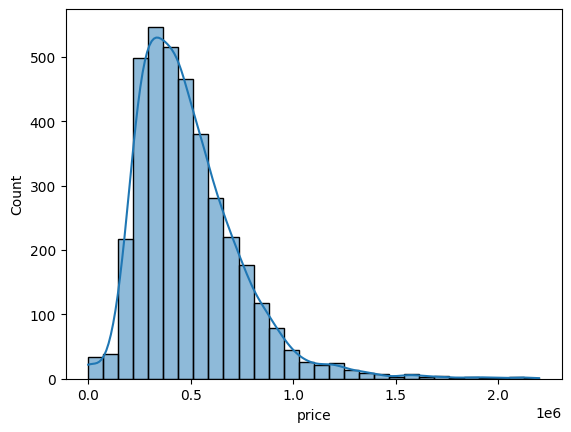

In [15]:
sns.histplot(df1['price'], bins=30, kde=True)

<Axes: ylabel='price'>

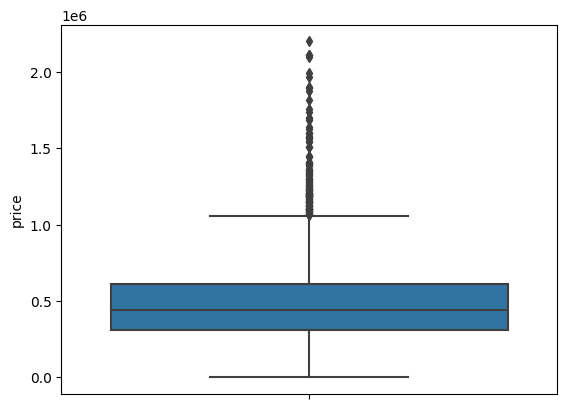

In [16]:
sns.boxplot(y=df1['price'])

<Axes: xlabel='waterfront', ylabel='count'>

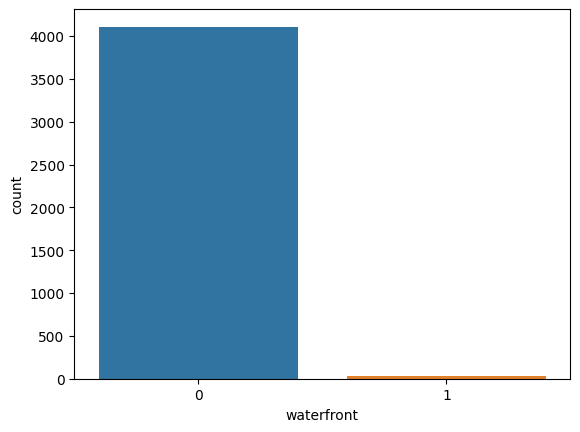

In [17]:
sns.countplot(x='waterfront', data=df)

<Axes: >

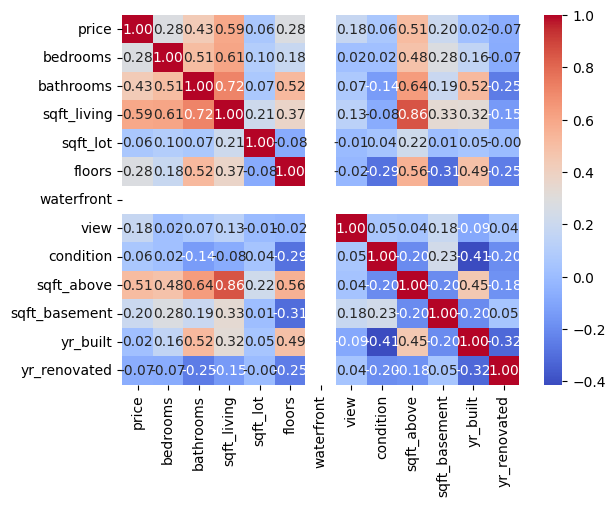

In [18]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
sns.heatmap(df1[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')

## Feature engineering

In [19]:
df2=df1.drop(['date','street','country'],axis=1)
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,Seattle,WA 98103
3,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,Seattle,WA 98117
4,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,Seattle,WA 98146
5,320000.0,3.0,2.50,2130,6969,2.0,0,0,3,2130,0,2003,0,Maple Valley,WA 98038
6,875000.0,4.0,2.00,2520,6000,1.0,0,0,3,1400,1120,1921,2007,Seattle,WA 98103


In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3742 entries, 0 to 4139
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          3742 non-null   float64
 1   bedrooms       3742 non-null   float64
 2   bathrooms      3742 non-null   float64
 3   sqft_living    3742 non-null   int64  
 4   sqft_lot       3742 non-null   int64  
 5   floors         3742 non-null   float64
 6   waterfront     3742 non-null   int64  
 7   view           3742 non-null   int64  
 8   condition      3742 non-null   int64  
 9   sqft_above     3742 non-null   int64  
 10  sqft_basement  3742 non-null   int64  
 11  yr_built       3742 non-null   int64  
 12  yr_renovated   3742 non-null   int64  
 13  city           3742 non-null   object 
 14  statezip       3742 non-null   object 
dtypes: float64(4), int64(9), object(2)
memory usage: 467.8+ KB


In [21]:
df2['statezip']=df1['statezip'].str.extract(r'(\d+)').astype(int)

In [22]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df2['city'] = label_encoder.fit_transform(df1['city'])

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3742 entries, 0 to 4139
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          3742 non-null   float64
 1   bedrooms       3742 non-null   float64
 2   bathrooms      3742 non-null   float64
 3   sqft_living    3742 non-null   int64  
 4   sqft_lot       3742 non-null   int64  
 5   floors         3742 non-null   float64
 6   waterfront     3742 non-null   int64  
 7   view           3742 non-null   int64  
 8   condition      3742 non-null   int64  
 9   sqft_above     3742 non-null   int64  
 10  sqft_basement  3742 non-null   int64  
 11  yr_built       3742 non-null   int64  
 12  yr_renovated   3742 non-null   int64  
 13  city           3742 non-null   int64  
 14  statezip       3742 non-null   int64  
dtypes: float64(4), int64(11)
memory usage: 467.8 KB


In [24]:
df2.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,34,98103
3,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,34,98117
4,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,34,98146


## Model Building

In [25]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor,ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [26]:
def evaluate_model(model, X, y, model_name):
    y_pred = model.predict(X)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)
    mape = np.mean(np.abs((y - y_pred) / y)) * 100

    results = {
        'Model': model_name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-squared': r2,
        'MAPE': mape
    }
    results_df = pd.DataFrame([results])
    return results_df

In [27]:
X = df2.drop('price',axis = 1)
y = df2.price
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,34,98103
3,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,34,98117
4,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,34,98146
5,3.0,2.50,2130,6969,2.0,0,0,3,2130,0,2003,0,20,98038
6,4.0,2.00,2520,6000,1.0,0,0,3,1400,1120,1921,2007,34,98103


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [29]:
X_train.shape

(2619, 14)

In [30]:
all_metrics_df = pd.DataFrame()

# List of models and their names
models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor()),
    ("Gradient Boosting", GradientBoostingRegressor()),
    ("AdaBoost", AdaBoostRegressor()),
    ("XGBoost", XGBRegressor()),
    ('extraTrees', ExtraTreesRegressor()),
    ('mlp', MLPRegressor()),
    ('svr',SVR()),

]

for name, model in models:
    model.fit(X_train, y_train)
    metrics_df = evaluate_model(model, X_test, y_test, name)
    all_metrics_df = pd.concat([all_metrics_df, metrics_df], ignore_index=True)
all_metrics_df

,Model,MAE,MSE,RMSE,R-squared,MAPE
0,Linear Regression,133851.938866,3.699603e+10,192343.519427,0.446472,inf
1,Ridge Regression,133851.141314,3.699618e+10,192343.913934,0.446470,inf
2,Lasso Regression,133851.896518,3.699603e+10,192343.525435,0.446472,inf
3,Decision Tree,134244.325755,4.939311e+10,222245.613995,0.260989,inf
4,Random Forest,103085.819392,2.665901e+10,163275.879699,0.601132,inf
5,Gradient Boosting,101773.620143,2.505651e+10,158292.489724,0.625109,inf
6,AdaBoost,154208.817425,4.325312e+10,207973.840776,0.352854,inf
7,XGBoost,94621.704548,2.330804e+10,152669.721572,0.651269,inf
8,extraTrees,112277.055365,3.050935e+10,174669.266524,0.543524,inf
9,mlp,150704.501571,4.535518e+10,212967.551527,0.321404,inf


In [31]:
all_metrics_df.sort_values(by='MAE',)

,Model,MAE,MSE,RMSE,R-squared,MAPE
7,XGBoost,94621.704548,2.330804e+10,152669.721572,0.651269,inf
5,Gradient Boosting,101773.620143,2.505651e+10,158292.489724,0.625109,inf
4,Random Forest,103085.819392,2.665901e+10,163275.879699,0.601132,inf
8,extraTrees,112277.055365,3.050935e+10,174669.266524,0.543524,inf
1,Ridge Regression,133851.141314,3.699618e+10,192343.913934,0.446470,inf
2,Lasso Regression,133851.896518,3.699603e+10,192343.525435,0.446472,inf
0,Linear Regression,133851.938866,3.699603e+10,192343.519427,0.446472,inf
3,Decision Tree,134244.325755,4.939311e+10,222245.613995,0.260989,inf
9,mlp,150704.501571,4.535518e+10,212967.551527,0.321404,inf
6,AdaBoost,154208.817425,4.325312e+10,207973.840776,0.352854,inf


In [32]:
xgb= XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [33]:
y_pred = xgb.predict(X_test)
y_pred

array([ 758979.75,  903649.3 , 1602178.8 , ...,  864112.7 ,  271206.94,
        329507.2 ], dtype=float32)

In [34]:
r2_score( y_test,y_pred)

0.651269095624293

In [35]:
param_grid_xgb = {
    'regressor_xgb__n_estimators': [200, 300, 400],  
    'regressor_xgb__max_depth': [3, 5, 7],  
    'regressor_xgb__learning_rate': [0.01, 0.1]
}
pipeline_xgb = Pipeline([('regressor_xgb', XGBRegressor())])
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=kfold, scoring='r2', n_jobs=-1, verbose=4)
search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('regressor_xgb',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     gamma=None,
                                                     grow_poli...
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'regressor_xgb__learning_rate': [0.01, 0.1],
                         'regressor_xgb__max_depth': [3, 5, 7],
                         'regressor_xgb__n_estimators': [200, 300, 400]},
             scoring='r2', verbose=4)

In [36]:
search_xgb.best_params_

{'regressor_xgb__learning_rate': 0.1,
 'regressor_xgb__max_depth': 5,
 'regressor_xgb__n_estimators': 300}

In [37]:
search_xgb.best_score_

0.6575289151696201

In [38]:
model =XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=300)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [39]:
y_pred=model.predict(X_test)
y_pred

array([ 837271.4 ,  875022.7 , 1364317.8 , ...,  842490.6 ,  267994.12,
        326450.06], dtype=float32)

In [40]:
print(r2_score(y_test, y_pred))

0.6670856546810568


In [41]:
# from pickle import load,dump
# with open('Usa-price1.pkl', 'wb') as file:
#     dump(model, file)

In [42]:
# Save the label encoder
# with open('Usa_label1.pkl', 'wb') as file:
#     dump(label_encoder, file)